<br/><div id="top"></div>
<center><a style="font-size: 40pt; font-weight:bold"> Signal Processing TP1</a></center>
<br/>

---

# Group members
* Jauroyon, Maxime
* Bhatt, Ragi

---

# Exercise 1 - Guitar Tuner

## Data

    single notes in wav files: string_1.wav, string_2.wav, string_3.wav
    Guitar notes and corresponding frequencies:
        E1: 329.63 Hz
        B2: 246.94 Hz
        G3: 196.00 Hz
        D4: 146.83 Hz
        A5: 110.00 Hz
        E6: 82.41 Hz
    Values of 1 cent for accuracy of each string: 0.15, 0.15, 0.15, 0.08, 0.08, 0.04 (see: http://zerocapcable.com/?page_id=225 and https://www.engineeringtoolbox.com/octave-bands-frequency-limits-d_1602.html)

## Goal

For each wav files:

    Perform a spectral analysis
    Automatically determine the played note with the accuracy in cent

## Import the libraries

In [1]:
# Import the modules we need
import numpy as np
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

#visualisation libraries
# import plotly.graph_objects as go
# takes too much space so we removed it
import matplotlib.pyplot as plt

In [2]:
# if plotly is not installed, uncomment the following line
# !pip install plotly

## Plotting the first wav file

Sampling frequency =  44100 Hz
Number of samples =  237568


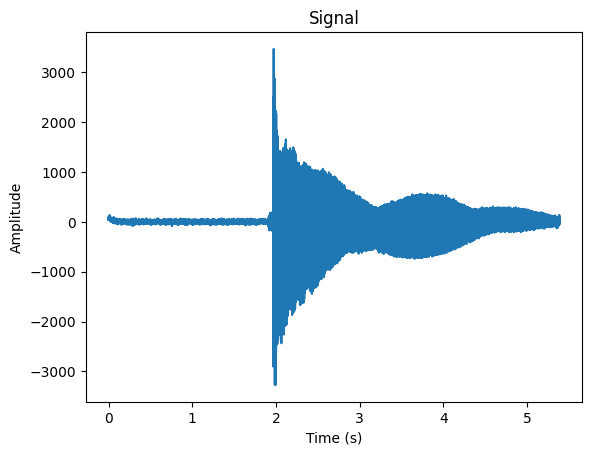

In [3]:
# Read the wav file
fs, data = wavfile.read('string_1.wav')

# Print the sampling frequency and the number of samples
print('Sampling frequency = ', fs, 'Hz')
print('Number of samples = ', data.shape[0])

# Create a time vector
t = np.arange(data.shape[0]) / fs

# Plot the signal with go
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=t, y=data, name='Signal'))
# fig.update_layout(title='Signal', xaxis_title='Time (s)', yaxis_title='Amplitude')
# fig.show()

# Plot the signal with matplotlib
plt.plot(t, data)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### With plotly we can inspect the plot with our mouse which is very convenient for the next steps 

## Perform the spectral analysis

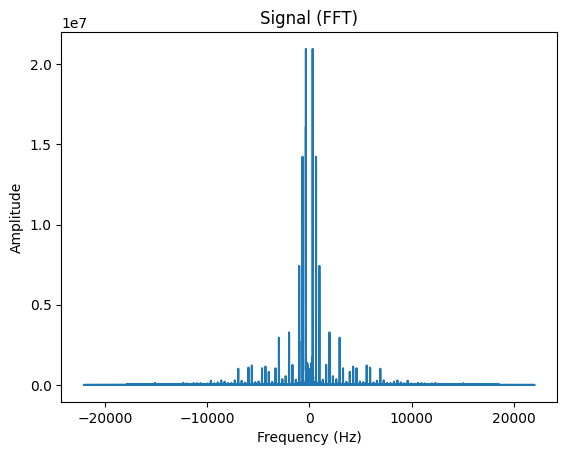

In [4]:
# Compute the Fourier transform
data_fft = fft(data)

# Compute the frequencies vector
f = fftfreq(data.shape[0], 1/fs)

# Plot the results with go
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=f, y=np.abs(data_fft), name='Signal (FFT)'))
# fig.update_layout(title='Signal (FFT)', xaxis_title='Frequency (Hz)', yaxis_title='Amplitude')
# fig.show()

# Plot the results with matplotlib
plt.plot(f, np.abs(data_fft))
plt.title('Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

### It's symmetric so we only keep the positive frequencies and we zoom in

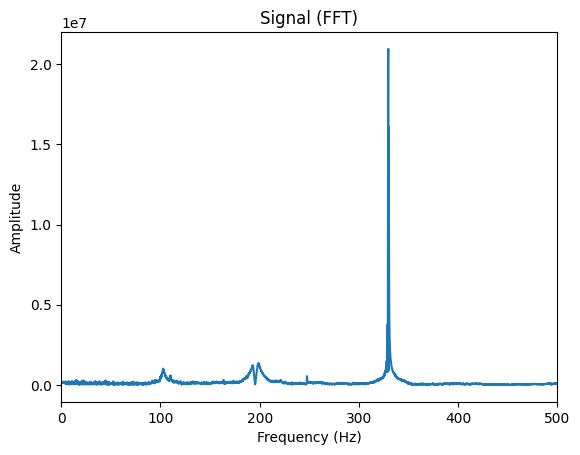

In [5]:
# only keep the positive frequencies and zoom in with go
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=f[f >= 0], y=np.abs(data_fft[f >= 0]), name='Signal (FFT)'))
# fig.update_layout(title='Signal (FFT)', xaxis_title='Frequency (Hz)', yaxis_title='Amplitude', xaxis_range=[0, 500])
# fig.show()

# only keep the positive frequencies and zoom in with matplotlib
plt.plot(f[f >= 0], np.abs(data_fft[f >= 0]))
plt.title('Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 500])
plt.show()


### We can clearly see that the note should be E1 because of the peak around 329.68 Hz (used the mouse to get the exact value)

## Let's do the simpliest algorithm by saying that the peak with the highest magnitude is the note played

Frequency =  329.68076508620686 Hz
Accuracy =  0.33333333333340914 cent
Note =  E1


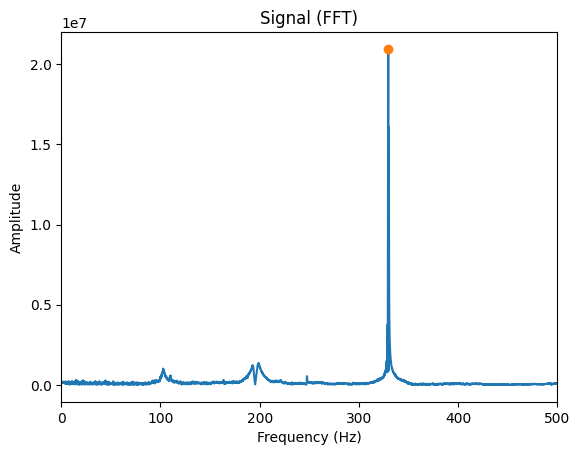

In [6]:
# Find the index of the maximum value of the Fourier transform
index = np.argmax(np.abs(data_fft[f >= 0]))

# Determine the frequency of the played note
freq = f[f >= 0][index]

# The frequencies of the strings
notes = np.array([329.63, 246.94, 196.00, 146.83, 110.00, 82.41])

# Find the closest note to the played note with Hz
indexNote = np.argmin(np.abs(notes - freq.round(2)))

# the name of the strings
noteName = np.array(['E1', 'B2', 'G3', 'D4', 'A5', 'E6'])

# the accuracy in cent for each string
centAccuracy = np.array([0.15, 0.15, 0.15, 0.08, 0.08, 0.04])

# Determine the accuracy in cent for the played note
accuracy = (freq.round(2) - notes[indexNote]) / centAccuracy[indexNote]

# Print the results
print('Frequency = ', freq, 'Hz')
print('Accuracy = ', accuracy, 'cent')
print('Note = ', noteName[indexNote])

# Plot the results with go
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=f[f >= 0], y=np.abs(data_fft[f >= 0]), name='Signal (FFT)'))
# fig.add_trace(go.Scatter(x=[freq], y=[np.abs(data_fft[f >= 0][index])], mode='markers', name='Note '+noteName[indexNote]))
# fig.update_layout(title='Signal (FFT)', xaxis_title='Frequency (Hz)', yaxis_title='Amplitude', xaxis_range=[0, 500])
# fig.show()

# Plot the results with matplotlib
plt.plot(f[f >= 0], np.abs(data_fft[f >= 0]))
plt.plot([freq], [np.abs(data_fft[f >= 0][index])], 'o')
plt.title('Signal (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim([0, 500])
plt.show()


Putting everything into a function

In [7]:
# Do a function who do all this for a given string_x.wav file

def fourrier_transform(wavfilename):

    # Read the wav file
    fs, data = wavfile.read(wavfilename)

    # Create a time vector
    t = np.arange(data.shape[0]) / fs

    # Compute the Fourier transform with scipy
    data_fft = fft(data)

    # Compute the frequencies vector
    f = fftfreq(data.shape[0], 1/fs)

    # Find the index of the maximum value of the Fourier transform
    index = np.argmax(np.abs(data_fft[f >= 0]))

    # Determine the frequency of the played note
    freq = f[f >= 0][index]

    # The frequencies of the strings
    notes = np.array([329.63, 246.94, 196.00, 146.83, 110.00, 82.41])

    # Find the closest note to the played note with Hz
    indexNote = np.argmin(np.abs(notes - freq.round(2)))

    # the name of the strings
    noteName = np.array(['E1', 'B2', 'G3', 'D4', 'A5', 'E6'])

    # the accuracy in cent for each string
    centAccuracy = np.array([0.15, 0.15, 0.15, 0.08, 0.08, 0.04])

    # Determine the accuracy in cent for the played note
    accuracy = (freq.round(2) - notes[indexNote]) / centAccuracy[indexNote]

    # Print the results
    print('Frequency = ', freq, 'Hz')
    print('Accuracy = ', accuracy, 'cent')
    print('Note = ', noteName[indexNote])

    # Plot the results with go
    # fig = go.Figure()
    # fig.add_trace(go.Scatter(x=f[f >= 0], y=np.abs(data_fft[f >= 0]), name='Signal (FFT)'))
    # fig.add_trace(go.Scatter(x=[freq], y=[np.abs(data_fft[f >= 0][index])], mode='markers', name='Note '+noteName[indexNote]))
    # fig.update_layout(title='Signal (FFT) of ' + wavfilename, xaxis_title='Frequency (Hz)', yaxis_title='Amplitude', xaxis_range=[0, 500])
    # fig.show()

    # Plot the results with matplotlib
    plt.plot(f[f >= 0], np.abs(data_fft[f >= 0]))
    plt.plot([freq], [np.abs(data_fft[f >= 0][index])], 'o')
    plt.title('Signal (FFT) of ' + wavfilename)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 500])
    plt.show()

Frequency =  329.68076508620686 Hz
Accuracy =  0.33333333333340914 cent
Note =  E1


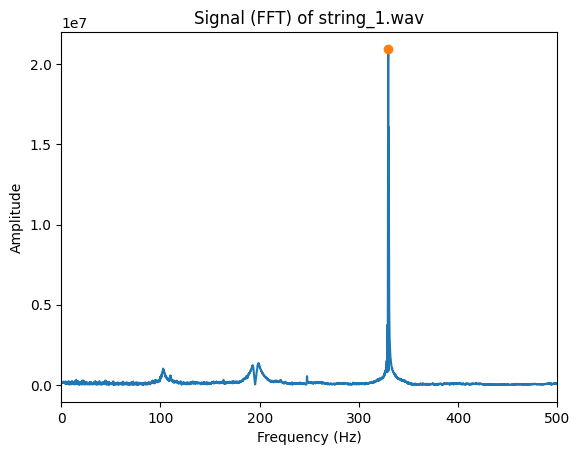

In [8]:
fourrier_transform('string_1.wav')

Frequency =  392.14710970893543 Hz
Accuracy =  416.7999999999999 cent
Note =  E1


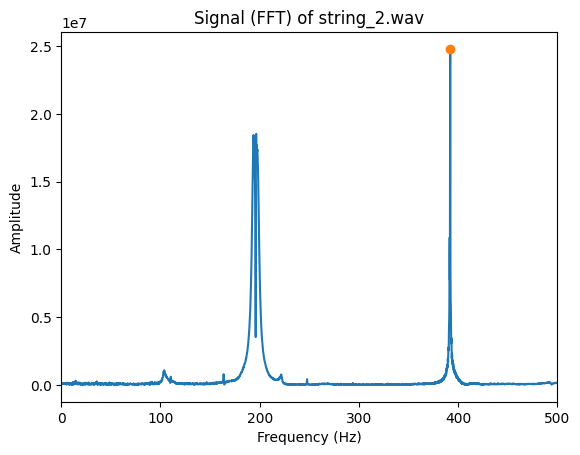

In [9]:
fourrier_transform('string_2.wav')

Frequency =  110.12232194557035 Hz
Accuracy =  1.5000000000000568 cent
Note =  A5


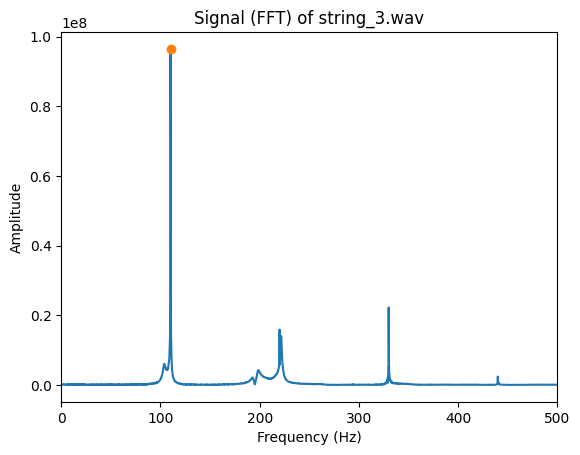

In [10]:
fourrier_transform('string_3.wav')

### Seems to work just fine for the first and third wav files (always < 5 cents accuracy) but for the second that isn't the right strategy !!

## Instead we will take the peak with the highest energy, for that we compute the energy for each range of Hz of all the possible notes and take the maximum

In [11]:
# Let's explore a bit more second wave file to find the right note

def fourrier_transform2(wavfilename):

    # Read the wav file
    fs, data = wavfile.read(wavfilename)

    # Create a time vector
    t = np.arange(data.shape[0]) / fs

    # Compute the Fourier transform with scipy
    data_fft = fft(data)

    # Compute the frequencies vector
    f = fftfreq(data.shape[0], 1/fs)

    #----------------------------------------------------- CHANGES -------------------------------------------------------

    # Lets not Find the index of the maximum value of the Fourier transform this time

    # let's find the peak with the highest energy in the range of frequency of the notes

    # The frequencies of the strings
    notes = np.array([329.63, 246.94, 196.00, 146.83, 110.00, 82.41])

    # the range of frequency of each note (arbitrary)
    rangefreqnote = np.array([[300, 350], [230, 260], [180, 210], [140, 150], [100, 120], [80, 90]])

    # compute the energy in the range of frequency of each note
    energy = np.array([np.sum(np.abs(data_fft[(f >= rangefreqnote[i][0]) & (f <= rangefreqnote[i][1])])) for i in range(len(notes))])

    # find the index of the note with the highest energy
    indexNote = np.argmax(energy)

    # find the index of the peak with the highest energy in the range of frequency of the note
    index = np.argmax(np.abs(data_fft[(f >= rangefreqnote[indexNote][0]) & (f <= rangefreqnote[indexNote][1])]))

    # Determine the frequency of the played note
    # don't forget to add the lower bound of the range of frequency of the note
    freq = f[(f >= rangefreqnote[indexNote][0]) & (f <= rangefreqnote[indexNote][1])][index]
    # and not
    # freq = f[f >= 0][index]

    #---------------------------------------------------------------------------------------------------------------------

    # the name of the strings
    noteName = np.array(['E1', 'B2', 'G3', 'D4', 'A5', 'E6'])

    # the accuracy in cent for each string
    centAccuracy = np.array([0.15, 0.15, 0.15, 0.08, 0.08, 0.04])

    # Determine the accuracy in cent for the played note
    accuracy = (freq.round(2) - notes[indexNote]) / centAccuracy[indexNote]

    # Print the results
    print('Frequency = ', freq, 'Hz')
    print('Accuracy = ', accuracy, 'cent')
    print('Note = ', noteName[indexNote])

    # Plot the results with go
    # fig = go.Figure()
    # fig.add_trace(go.Scatter(x=f[f >= 0], y=np.abs(data_fft[f >= 0]), name='Signal (FFT)'))
    # fig.add_trace(go.Scatter(x=[freq], y=[np.abs(data_fft[f >= 0][index])], mode='markers', name='Note '+noteName[indexNote]))
    # fig.update_layout(title='Signal (FFT) of ' + wavfilename, xaxis_title='Frequency (Hz)', yaxis_title='Amplitude', xaxis_range=[0, 500])
    # fig.show()

    # Plot the results with matplotlib
    plt.plot(f[f >= 0], np.abs(data_fft[f >= 0]))
    plt.plot([freq], [np.abs(data_fft[f >= 0][index])], 'o')
    plt.title('Signal (FFT) of ' + wavfilename)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 500])
    plt.show()
    

Frequency =  196.54106452269488 Hz
Accuracy =  3.5999999999999472 cent
Note =  G3


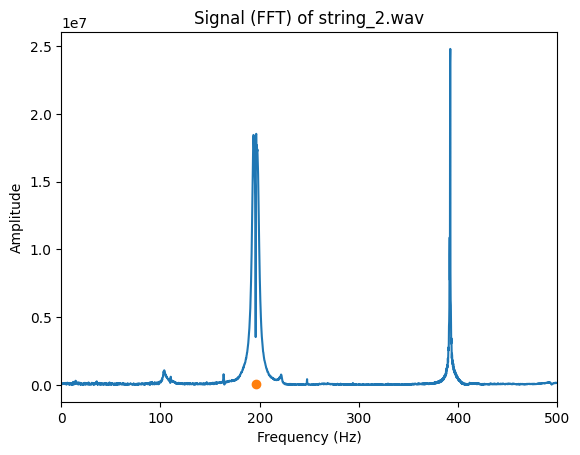

In [12]:
fourrier_transform2('string_2.wav')

Frequency =  329.68076508620686 Hz
Accuracy =  0.33333333333340914 cent
Note =  E1


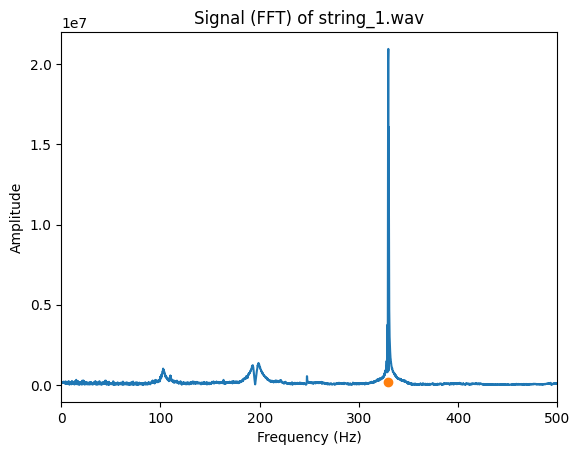

In [13]:
fourrier_transform2('string_1.wav')

Frequency =  110.12232194557035 Hz
Accuracy =  1.5000000000000568 cent
Note =  A5


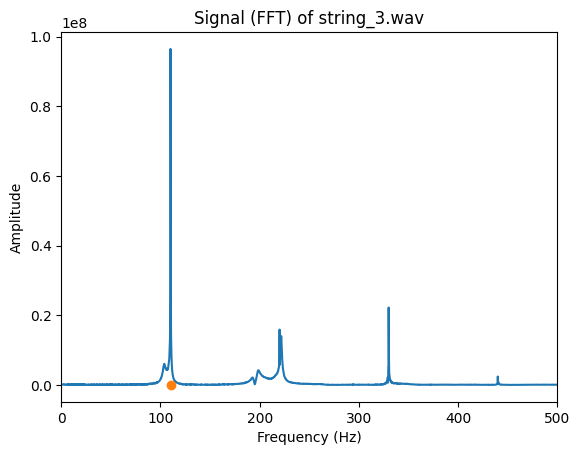

In [14]:
fourrier_transform2('string_3.wav')

### This time it works for the three wav files and always with less than 5 cents accuracy away from the theoretical note

---

# Exercice 2 - Zoom-in image

## Data

    Barbara.jpg
    Images you want !


## Goal

For a given image:

    Perform a spectral analysis
    Resize the image to get a smaller image of half size
        in the space domain by subsampling
        by resizing in the Fourier domain
    Resize the image to get a bigger image of double size
        by sinc interpolation (zero padding in the Fourier domain)
        by linear interpolation in the space domain


## Import the libraries

In [15]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import fftpack
from scipy import ndimage
import cv2

## Plotting the image

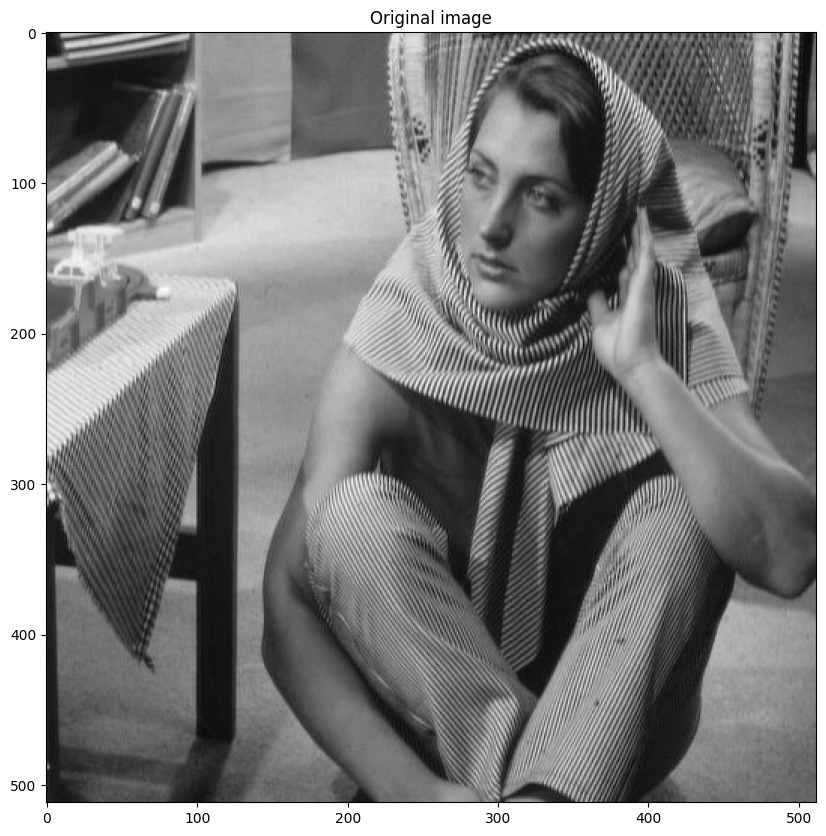

In [16]:
# Load image
img = mpimg.imread('barbara.jpg')
img = img[:,:,0]

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.show()

### We will keep the axis to make sure that we truly zoom in or out

## Perform spectral analysis

In [17]:
# spectral analysis
img_fft = fftpack.fft2(img)
# shift the zero-frequency component to the center of the spectrum
img_fft = fftpack.fftshift(img_fft)
# calculate the magnitude
img_fft = np.abs(img_fft)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_fft, cmap='gray')
plt.title('Spectral analysis')
plt.show()

### We have to use a log to see something

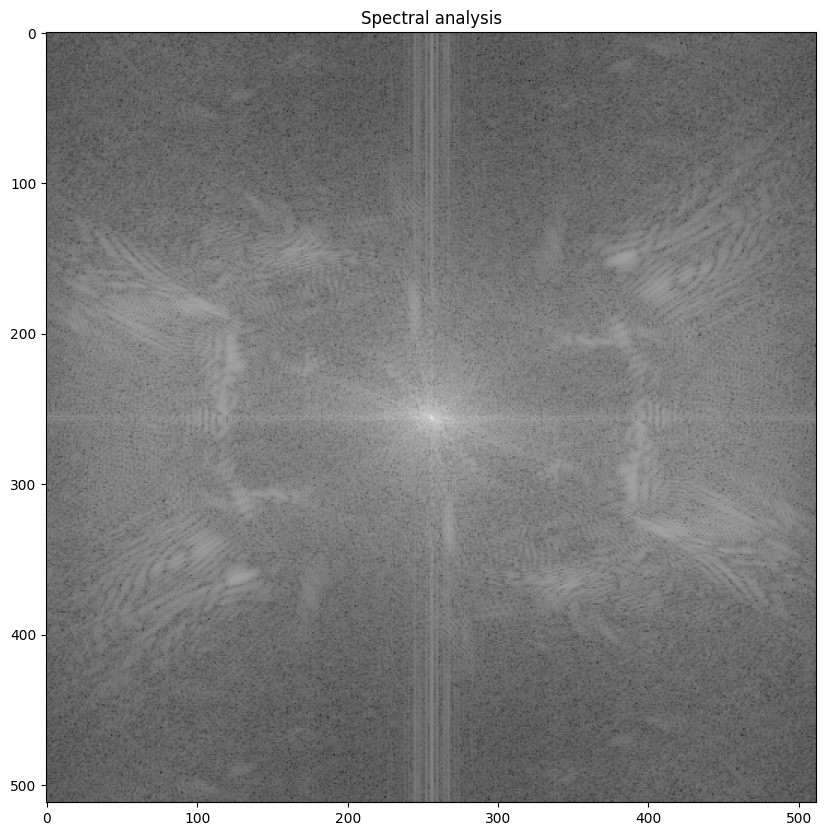

In [18]:
# add 1 to avoid log(0)
img_fft = 20*np.log(img_fft + 1)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_fft, cmap='gray')
plt.title('Spectral analysis')
plt.show()

### and we can also plot the phase

In [19]:
# plot the phase
img_fft = fftpack.fft2(img)
img_fft = fftpack.fftshift(img_fft)
img_fft = np.angle(img_fft)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_fft, cmap='gray')
plt.title('Phase')
plt.show()

### We than try to get back the image after fourier transform

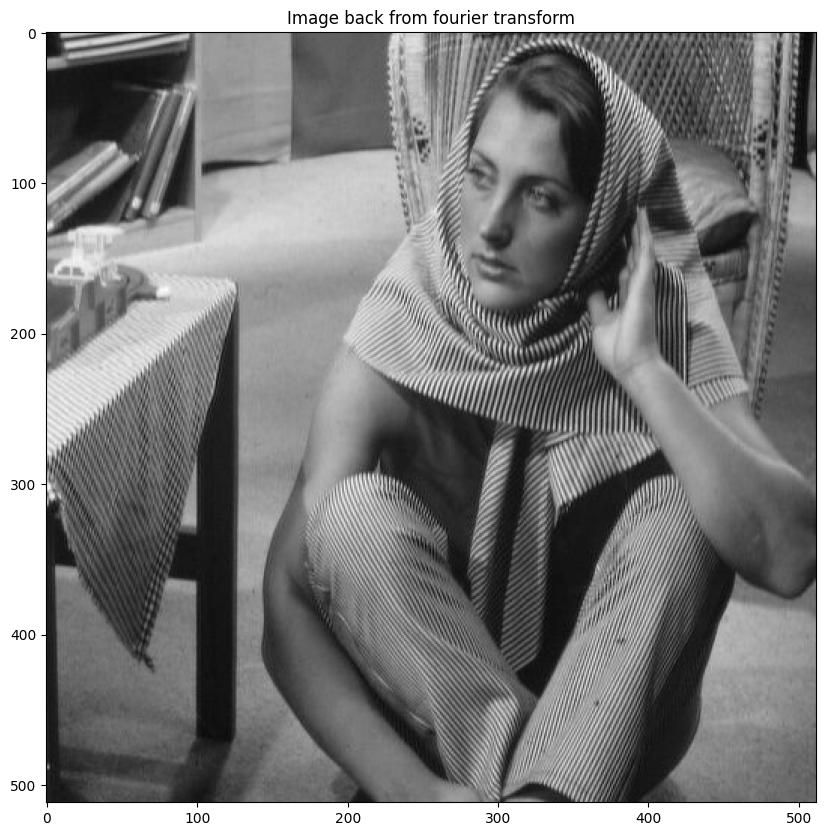

In [20]:
# get the image back from the fourier transform

# spectral analysis
img_fft = fftpack.fft2(img)
img_fft = fftpack.fftshift(img_fft)

# we get the image back
img_fft = fftpack.ifftshift(img_fft)
img_fft = fftpack.ifft2(img_fft)
img_fft = np.abs(img_fft)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_fft, cmap='gray')
plt.title('Image back from fourier transform')
plt.show()

### now we are ready to do the resizing

## Resize the image to get a smaller image of half size

## In the space domain by subsampling

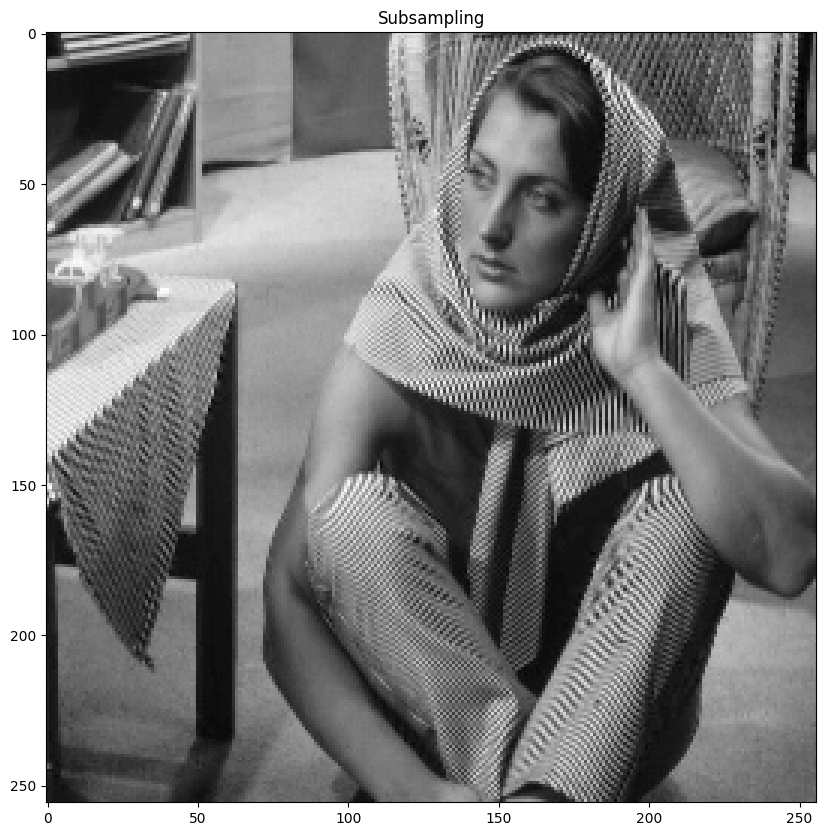

In [21]:
# Resize the image to get a smaller image of half size

# # in the space domain by subsampling
# img_sub = img[::2,::2]

# resize the image with resize function gives the same result
img_sub = ndimage.zoom(img, 0.5)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_sub, cmap='gray')
plt.title('Subsampling')
plt.show()

### We have aliasing because we didn't smooth the image before subsampling, gaussian filter would have been a good choice

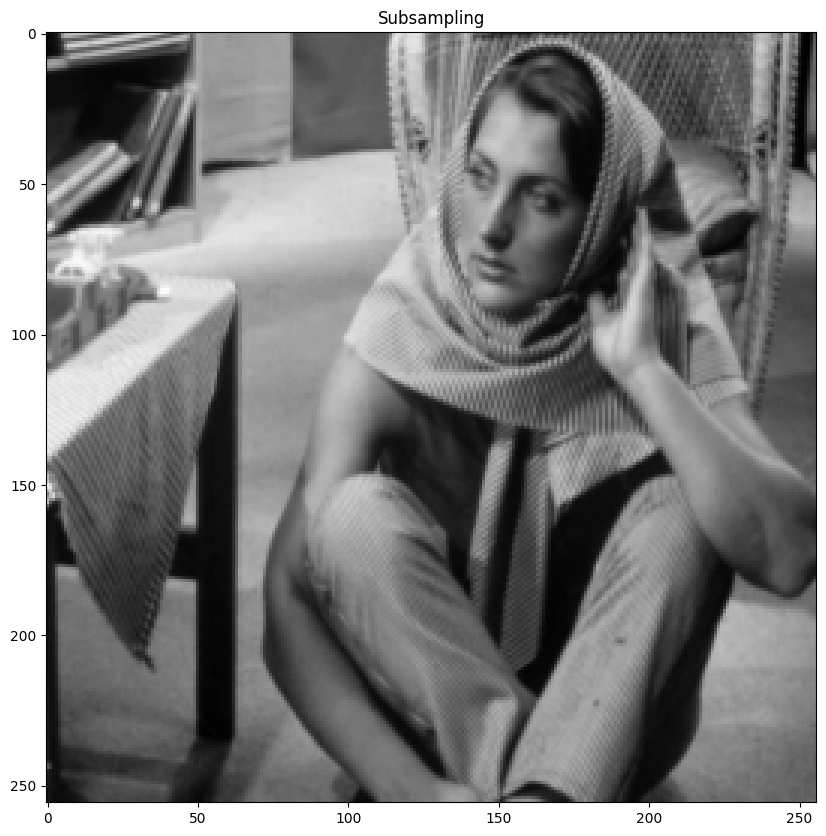

In [22]:
# smoothing before subsampling to avoid aliasing. We use a gaussian filter
img_sub = ndimage.gaussian_filter(img, sigma=1)

# # in the space domain by subsampling
# img_sub = img[::2,::2]

# resize the image with resize function gives the same result
img_sub = ndimage.zoom(img_sub, 0.5)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_sub, cmap='gray')
plt.title('Subsampling')
plt.show()

### it is now blurry but better than aliasing

## Let's try by resizing in the Fourier domain

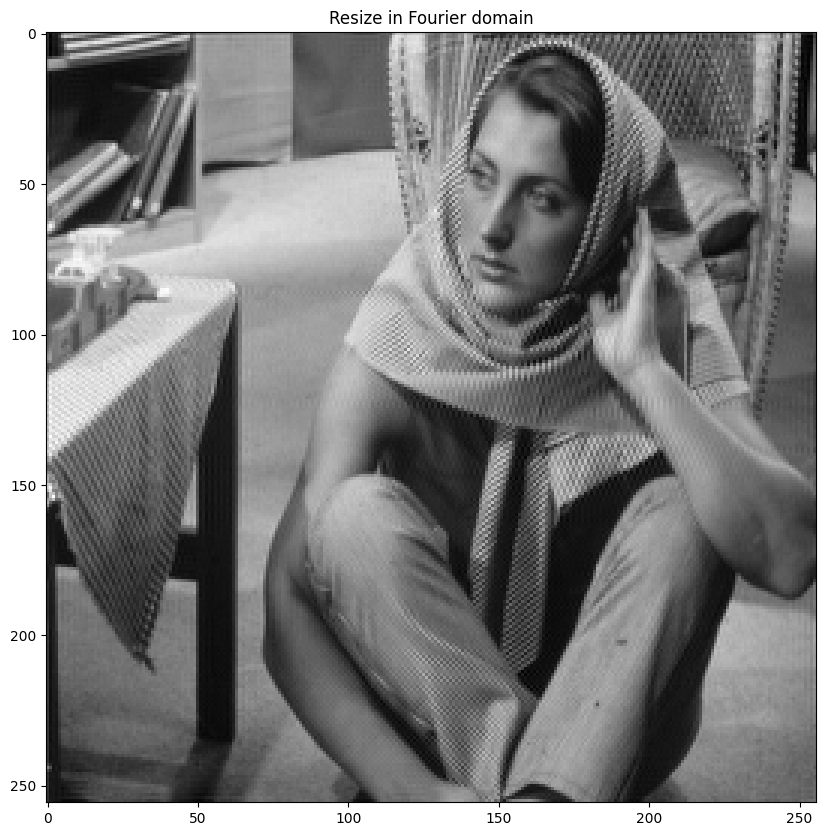

In [23]:
# by resizing in the Fourier domain
img_fft = fftpack.fft2(img)
img_fft = fftpack.fftshift(img_fft)

# only keep the central part of the fourier transform
new_img_fft = np.zeros((img_fft.shape[0]//2, img_fft.shape[1]//2), dtype=np.complex128)
new_img_fft[:,:] = img_fft[img_fft.shape[0]//4:3*img_fft.shape[0]//4, img_fft.shape[1]//4:3*img_fft.shape[1]//4]

# get the image back from the fourier transform
new_img_fft = fftpack.ifftshift(new_img_fft)
new_img_fft = fftpack.ifft2(new_img_fft)
new_img_fft = np.abs(new_img_fft)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(new_img_fft, cmap='gray')
plt.title('Resize in Fourier domain')
plt.show()

###  After fourier transform and the shift ! we are keeping the low frequencies in the middle (so most of the information) and it allows us to take only the central square but the result is also blurry

## Resize the image to get a bigger image of double size

## by sinc interpolation (zero padding in the Fourier domain)

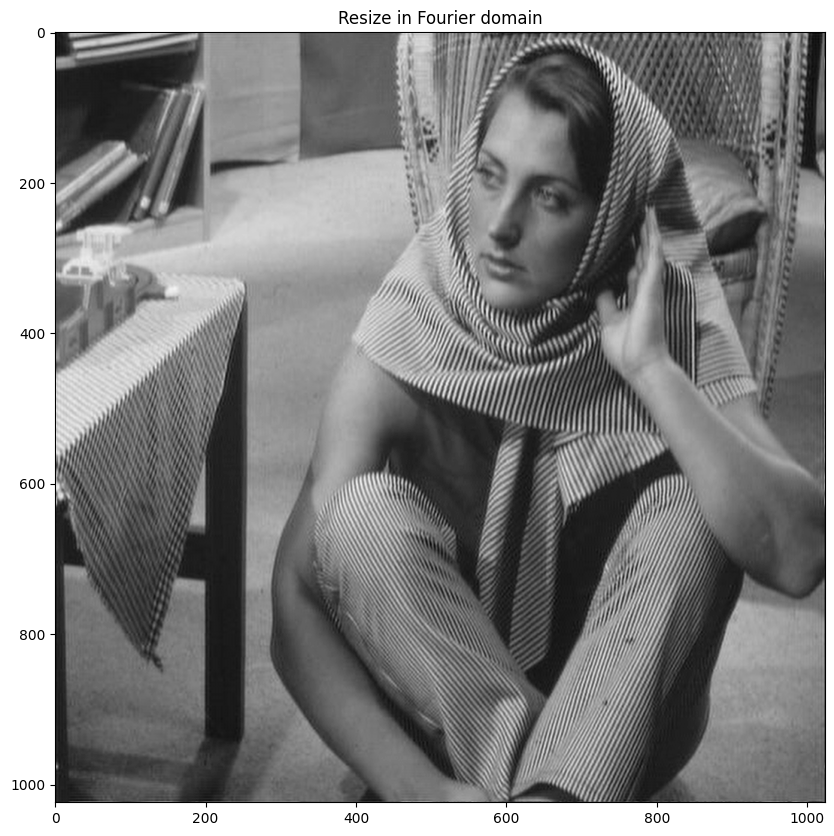

In [24]:
# by sinc interpolation (zero padding in the Fourier domain)

# fourier transform
img_fft = fftpack.fft2(img)
img_fft = fftpack.fftshift(img_fft)

# resize the image by zero padding in the Fourier domain
# by doubling the size of the image
adding_size = img_fft.shape[0]//2
# we add zeros on the left, right, top and bottom of the image
img_fft = np.pad(img_fft, ((adding_size,adding_size),(adding_size,adding_size)), 'constant', constant_values=(0,0))

# get the image back from the fourier transform
img_fft = fftpack.ifftshift(img_fft)
img_fft = fftpack.ifft2(img_fft)
img_fft = np.abs(img_fft)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_fft, cmap='gray')
plt.title('Resize in Fourier domain')
plt.show()

### We have to pad the image with zeros to get a bigger image and since we add data (after shiftting !!) around the image it is high frequencies so we had no information but the size is bigger. The result looks great !!

## Now let's try in the space domain

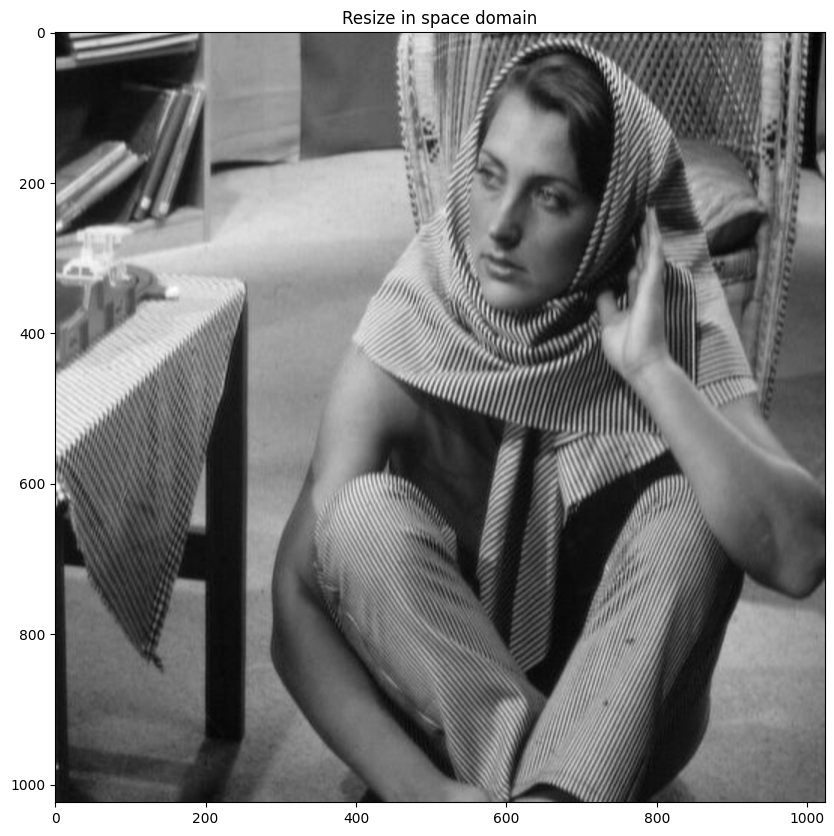

In [25]:
# resize the image by linear interpolation in the space domain
img_lin = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2), interpolation=cv2.INTER_LINEAR)

# the zoom function give the same result
# img_lin = ndimage.zoom(img, 2)

# Plot image
plt.figure(figsize=(10,10))
plt.imshow(img_lin, cmap='gray')
plt.title('Resize in space domain')
plt.show()

### No suitable difference observed from the previous image